<h1> Projeto de Análise de Queimadas

<h3>Instalando as bibliotecas necessárias

pip install numpy

pip install pandas

pip install matplotlib

<h3> Importando a base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv(r'C:\Users\bianc\analise-dados\br_inpe_prodes_municipio_bioma.csv',sep=',',encoding='cp1252')
tabela.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bianc\\analise-dados\\br_inpe_prodes_municipio_bioma.csv'

<h3> Tratando dados errados

In [76]:
# Substituir múltiplos erros de digitação
tabela['bioma'] = tabela['bioma'].replace({
    'AmazÃ´nia': 'Amazônia',
    'Mata AtlÃ¢ntica': 'Mata Atlântica',
})
tabela.head()

,ano,id_municipio,bioma,area_total,desmatado,vegetacao_natural,nao_vegetacao_natural,hidrografia
0,2012,1707207,Amazônia,0,61.9,-62.1,0.2,0.0
1,2004,1707207,Amazônia,0,60.0,-60.2,0.2,0.0
2,2015,1707207,Amazônia,0,61.9,-62.1,0.2,0.0
3,2021,1707207,Amazônia,0,61.9,-62.1,0.2,0.0
4,2017,1707207,Amazônia,0,61.9,-62.1,0.2,0.0


<h3> Selecionando apenas as colunas necessárias para análise

In [77]:
tabela.columns.values

array(['ano', 'id_municipio', 'bioma', 'area_total', 'desmatado',
       'vegetacao_natural', 'nao_vegetacao_natural', 'hidrografia'],
      dtype=object)

In [78]:
selecionadas = ['ano', 'bioma', 'desmatado',
       'vegetacao_natural', 'nao_vegetacao_natural', 'hidrografia']

In [79]:
tabela_nova = tabela.filter(items = selecionadas)
tabela_nova.head()

,ano,bioma,desmatado,vegetacao_natural,nao_vegetacao_natural,hidrografia
0,2012,Amazônia,61.9,-62.1,0.2,0.0
1,2004,Amazônia,60.0,-60.2,0.2,0.0
2,2015,Amazônia,61.9,-62.1,0.2,0.0
3,2021,Amazônia,61.9,-62.1,0.2,0.0
4,2017,Amazônia,61.9,-62.1,0.2,0.0


<h3> Agrupando os dados por ano e bioma

In [80]:
desmatamento_ano_bioma = tabela_nova.groupby(['ano', 'bioma'])['desmatado'].sum().reset_index()


<h3> Plotando os dados para vizualizar a tendência de desmatamento

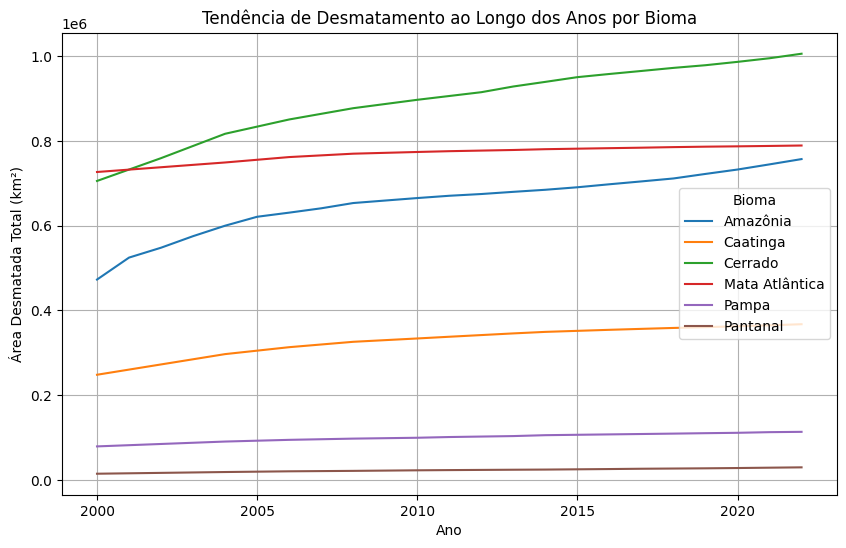

In [81]:
# Visualizar as tendências de desmatamento por bioma
plt.figure(figsize=(10, 6))

# Plotar os dados de cada bioma
for bioma in desmatamento_ano_bioma['bioma'].unique():
    bioma_data = desmatamento_ano_bioma[desmatamento_ano_bioma['bioma'] == bioma]
    plt.plot(bioma_data['ano'], bioma_data['desmatado'], label=bioma)

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Área Desmatada Total (km²)')
plt.title('Tendência de Desmatamento ao Longo dos Anos por Bioma')
plt.legend(title='Bioma')
plt.grid(True)
plt.show()


O gráfico gerado mostra a tendência do desmatamento ao longo dos anos para cada bioma. A partir dele, podemos identificar:

Aumento: Linhas com tendência de crescimento ao longo dos anos na Amazônia, Mata Atlântica, Caatinga e no Cerrado.

Constante: Linhas relativamente estáveis ao longo do tempo no Pantanal e Pampa.